In [1]:
import numpy as np
import matplotlib.pyplot as pp
pp.rcParams.update({'font.size': 14})
pp.rcParams['figure.figsize'] = [10, 5]

In [2]:
def heat_theta(u0,T,M,N,theta):
    from scipy import sparse
    from scipy.linalg import solve_banded
    import numpy as np
    
    h = 1/(N+1)
    k = T/M
    
    x = np.linspace(0,1,N+2)
    x_int = x[1:N+1]
    t = np.linspace(0,T,M+1)
    
    lam = k/h/h
    Ad = np.zeros((3,N))
    Ad[0,:] = theta*lam
    Ad[1,:] = 1-2*theta*lam
    Ad[2,:] = theta*lam

    Bd = np.zeros((3,N))
    Bd[0,:] = -(1-theta)*lam
    Bd[1,:] = 1+2*(1-theta)*lam
    Bd[2,:] = -(1-theta)*lam

    A = sparse.spdiags(Ad,(-1,0,1),N,N)

    ucurr = u0(x_int)    
    u = np.zeros((N+2,M+1))
    u[1:N+1,0] = ucurr
    
    for j in range(1,M+1):
        rhs = A.dot(ucurr)
        ucurr = solve_banded((1,1),Bd,rhs)
        u[1:N+1 ,j] = ucurr

    return (x,t,u)

In [4]:
def u0(x):
    return 1.0*(np.abs(x-0.5) < 0.25)

In [25]:
(x,t,u) = heat_theta(u0,T=0.1, M=20,N=20,theta=0.0)

In [26]:
(TT,XX) = np.meshgrid(x,t);

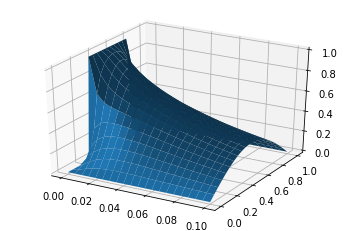

In [27]:
from mpl_toolkits import mplot3d
%matplotlib inline
(T,X)=np.meshgrid(t,x)
ax = pp.axes(projection='3d')
ax.plot_surface(T,X,u)

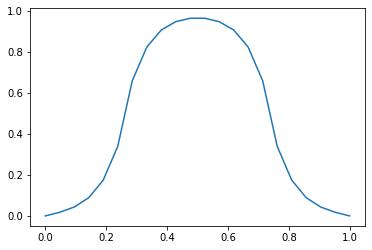

In [28]:
pp.plot(x,u[:,1])